In [1]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import random
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmeans import kmeans
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils.metric import distance_metric, type_metric

In [2]:
df1 = pd.read_csv('mallCust.csv')
df2 = pd.read_csv('iris.csv')
df3 = pd.read_csv('mobile.csv')

In [3]:
def update1(df):
  le = LabelEncoder()
  df['Gender'] = le.fit_transform(df['Gender'])
  df = df.drop(['CustomerID'], axis=1)
  return df
def update2(df):
  le = LabelEncoder()
  df['Species'] = le.fit_transform(df['Species'])
  y = df['Species']
  x = df.drop(['Id', 'Species'], axis=1)
  return x,y
def update3(df):
  y = df['price_range']
  x = df.drop('price_range', axis=1)
  return x,y

In [4]:
def tsnePCA(x):
  t = TSNE(verbose=1, metric='euclidean')
  tsneRes = t.fit_transform(x)
  p = PCA(2)
  pcaRes = p.fit_transform(x)
  return tsneRes,pcaRes

In [5]:
x1 = update1(df1)
x2,y2 = update2(df2)
x3,y3 = update3(df3)

In [33]:
print(list(y3).count(0))
print(list(y3).count(1))
print(list(y3).count(2))
print(list(y3).count(3))

500
500
500
500


In [6]:
def makeHypothesis(x,y=[]):
  t = TSNE(verbose=1, metric='euclidean')
  p = PCA(2)
  tsneRes = t.fit_transform(x)
  pcaRes = p.fit_transform(x)
  if len(y)>0:
    plt.scatter(tsneRes[:, 0], tsneRes[:, 1],c=y)
  else:
    plt.scatter(tsneRes[:, 0], tsneRes[:, 1])
  plt.title('TSNE Plot')
  plt.show()
  if len(y)>0:
    plt.scatter(pcaRes[:, 0], pcaRes[:, 1],c=y)
  else:
    plt.scatter(pcaRes[:, 0], pcaRes[:, 1])  
  plt.title('PCA Plot')
  plt.show()
  return tsneRes

Dataset 1
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 14.908392


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.893097
[t-SNE] KL divergence after 950 iterations: 0.197850


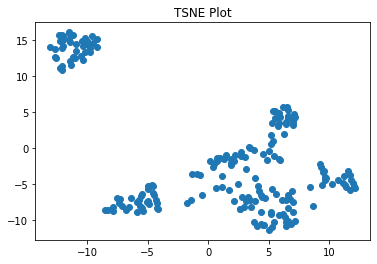

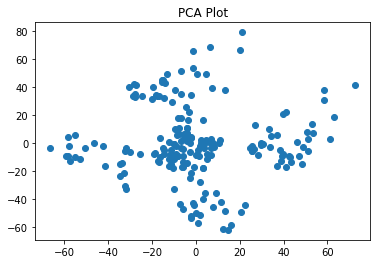

Dataset 2
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.511787


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.387260
[t-SNE] KL divergence after 1000 iterations: 0.123090


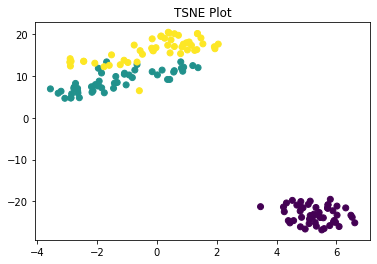

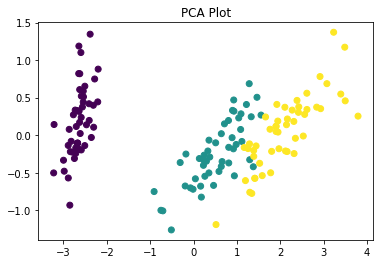

Dataset 3
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 2000 samples in 0.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 246.987250
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.576172
[t-SNE] KL divergence after 1000 iterations: 1.125413


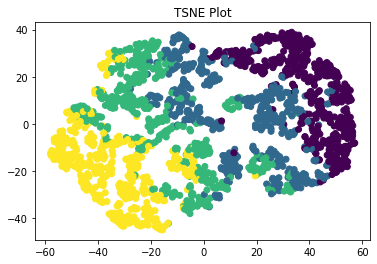

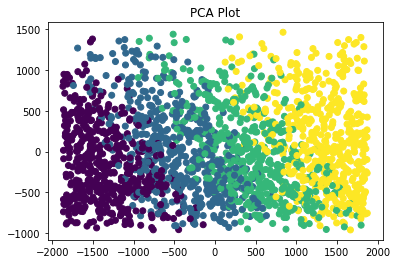

In [7]:
print('Dataset 1')
tsneRes1=makeHypothesis(x1)
print('Dataset 2')
tsneRes2=makeHypothesis(x2,y2)
print('Dataset 3')
tsneRes3=makeHypothesis(x3,y3)

In [16]:
def random_df(x):
    x_random = pd.DataFrame()
    for c in x.columns:
        x_random[c] = random.sample(list(x[c]), len(list(x[c])))
    return x_random

x1_random = random_df(x1)
x2_random = random_df(x2)
x3_random = random_df(x3)

Dataset 1
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 15.989363


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.653114
[t-SNE] KL divergence after 1000 iterations: 0.439737


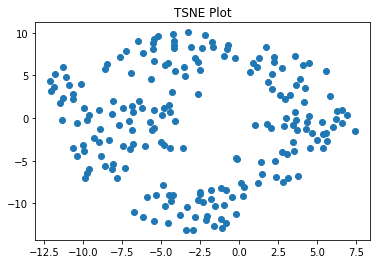

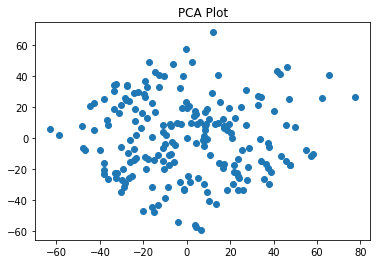

Dataset 2
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.912495


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.188728
[t-SNE] KL divergence after 950 iterations: 0.244872


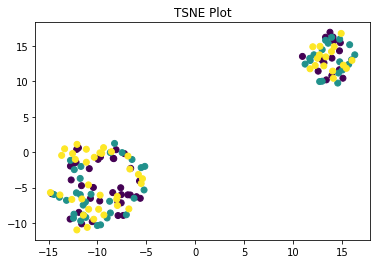

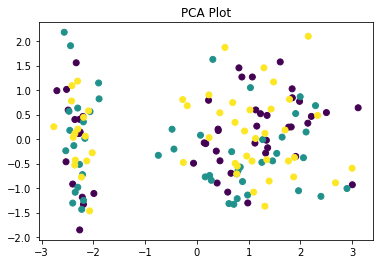

Dataset 3
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.151s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 257.072611
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.735382
[t-SNE] KL divergence after 1000 iterations: 1.184449


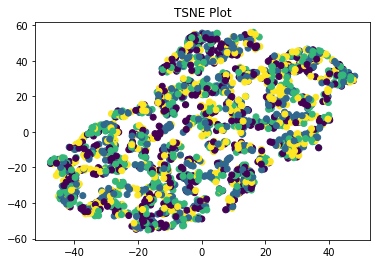

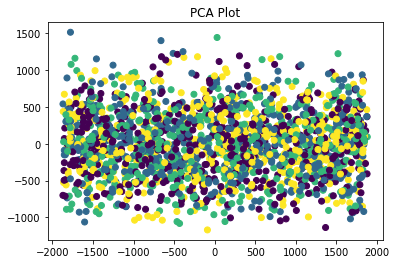

In [17]:
print('Dataset 1')
tsneRes1_random = makeHypothesis(x1_random)
print('Dataset 2')
tsneRes2_random = makeHypothesis(x2_random,y2)
print('Dataset 3')
tsneRes3_random = makeHypothesis(x3_random,y3)

In [18]:
def runOptics(x,tsne,ch,y=[]):
  if ch==1:
    min_samples=[1,10,20,30,50,100]
    metric=['minkowski','euclidean','l1','cityblock']
    p=[1,2]
    algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
    params=[]
    for i in min_samples:
      for j in metric:
        for k in p:
          for l in algorithm:
            params.append((i,j,k,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      model =OPTICS(min_samples=param[0],metric=param[1],p=param[2],algorithm=param[3])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if metrics.silhouette_score(x,lab, metric='euclidean')>best:
          best=metrics.silhouette_score(x,lab, metric='euclidean')
          bestLab=model.labels_
          bestP=param
    print(bestP)
    print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
    print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
    print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()
  elif ch==2:
    min_samples=[1,10,20,30,50,100]
    metric=['minkowski','euclidean','l1','cityblock']
    p=[1,2]
    algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
    params=[]
    for i in min_samples:
      for j in metric:
        for k in p:
          for l in algorithm:
            params.append((i,j,k,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      model =OPTICS(min_samples=param[0],metric=param[1],p=param[2],algorithm=param[3])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=model.labels_
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('F1 Score:',metrics.f1_score(bestLab,y,average='weighted'))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()
  else:
    min_samples=[1,10,50,100,300,500]
    metric=['minkowski','euclidean','l1','cityblock']
    p=[1,2]
    algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
    params=[]
    for i in min_samples:
      for j in metric:
        for k in p:
          for l in algorithm:
            params.append((i,j,k,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      model =OPTICS(min_samples=param[0],metric=param[1],p=param[2],algorithm=param[3])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=model.labels_
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('F1 Score:',metrics.f1_score(bestLab,y,average='weighted'))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()

Dataset 1
(30, 'minkowski', 2, 'auto')
Silhouette: 0.2161560150579193
Calinski Harabasz Score: 6.40880016841013
Davies Bouldin Score: 5.294855204585671


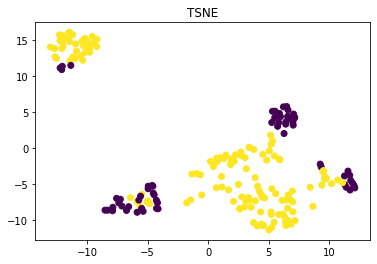

Dataset 2
(20, 'minkowski', 2, 'auto')
Rand Score 0.5681159420289855
Mutual Info Score: 0.7315847607219575
Homogenity Score: 0.9999999999999997
Completeness Score: 0.5793801642856945
Fowlkes Mallows Score: 0.7714542762891773
F1 Score: 0.7777777777777777


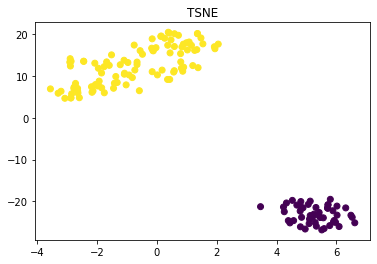

Dataset 3
(10, 'minkowski', 2, 'auto')
Rand Score 0.0009024579929416894
Mutual Info Score: 0.031708931410170255
Homogenity Score: 0.23312159988960535
Completeness Score: 0.0188822046091312
Fowlkes Mallows Score: 0.49108013441898046
F1 Score: 0.0003813229571984436


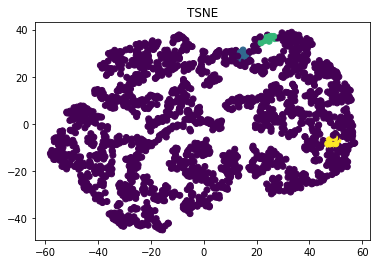

In [19]:
print('Dataset 1')
runOptics(x1,tsneRes1,1)
print('Dataset 2')
runOptics(x2,tsneRes2,2,y2)
print('Dataset 3')
runOptics(x3,tsneRes3,3,y3)

In [50]:
def runOpticsHyper(x,tsne,ch,y=[]):
  if ch==1:
    min_samples=[1,10,20,30,50,100]
    metric=['minkowski','euclidean','l1','cityblock']
    p=[1,2]
    algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
    params=[]
    for i in min_samples:
      for j in metric:
        for k in p:
          for l in algorithm:
            params.append((i,j,k,l))
    best=-1
    bestLab=[]
    bestP=()
    bestMetric={'minkowski':[-1,-1,-1],'euclidean':[-1,-1,-1],'l1':[-1,-1,-1],'cityblock':[-1,-1,-1]}
    bestmin_samples={1:[-1,-1,-1],10:[-1,-1,-1],20:[-1,-1,-1],30:[-1,-1,-1],50:[-1,-1,-1],100:[-1,-1,-1]}
    bestp={1:[-1,-1,-1],2:[-1,-1,-1]}
    bestalgorithm={'auto':[-1,-1,-1],'ball_tree':[-1,-1,-1],'kd_tree':[-1,-1,-1],'brute':[-1,-1,-1]}
    for param in params:
      model =OPTICS(min_samples=param[0],metric=param[1],p=param[2],algorithm=param[3])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        bestmin_samples[param[0]][0]=max(bestmin_samples[param[0]][0],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestmin_samples[param[0]][1]=max(bestmin_samples[param[0]][1],metrics.davies_bouldin_score(x,lab))
        bestMetric[param[1]][0]=max(bestMetric[param[1]][0],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestMetric[param[1]][1]=max(bestMetric[param[1]][1],metrics.davies_bouldin_score(x,lab))
        bestp[param[2]][0]=max(bestp[param[2]][0],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestp[param[2]][1]=max(bestp[param[2]][1],metrics.davies_bouldin_score(x,lab))
        bestalgorithm[param[3]][0]=max(bestalgorithm[param[3]][0],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestalgorithm[param[3]][1]=max(bestalgorithm[param[3]][1],metrics.davies_bouldin_score(x,lab))
    print(bestMetric)
    print(bestmin_samples)
    print(bestp)
    print(bestalgorithm)
    return bestMetric,bestmin_samples,bestp,bestalgorithm
    # print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
    # print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
    # print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
    # plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    # plt.title('TSNE')
    # plt.show()

In [51]:
print('Dataset 1')
bestmet,bestmin,bestp,bestalgo=runOpticsHyper(x1,tsneRes1,1)

Dataset 1
{'minkowski': [0.2161560150579193, 12.391474389041743, -1], 'euclidean': [0.2161560150579193, 9.35313204749635, -1], 'l1': [0.13136183027161424, 12.391474389041743, -1], 'cityblock': [0.13136183027161424, 12.391474389041743, -1]}
{1: [-1, -1, -1], 10: [0.08460273831445128, 2.5154878867108805, -1], 20: [0.021956688166916344, 2.361793738630983, -1], 30: [0.2161560150579193, 6.3778135911976825, -1], 50: [0.15428579059346278, 12.391474389041743, -1], 100: [-1, -1, -1]}
{1: [0.2161560150579193, 12.391474389041743, -1], 2: [0.2161560150579193, 12.391474389041743, -1]}
{'auto': [0.2161560150579193, 12.391474389041743, -1], 'ball_tree': [0.2161560150579193, 12.391474389041743, -1], 'kd_tree': [0.2161560150579193, 12.391474389041743, -1], 'brute': [0.2161560150579193, 12.391474389041743, -1]}


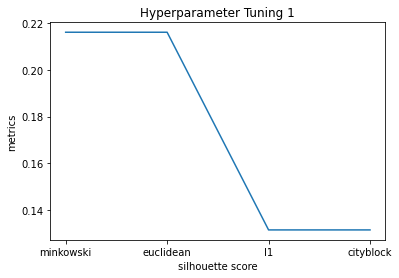

In [52]:
plt.plot(['minkowski','euclidean','l1','cityblock'],[bestmet['minkowski'][0],bestmet['euclidean'][0],bestmet['l1'][0],bestmet['cityblock'][0]] )
plt.xlabel('silhouette score')
plt.ylabel('metrics')
plt.title('Hyperparameter Tuning 1')
plt.show()

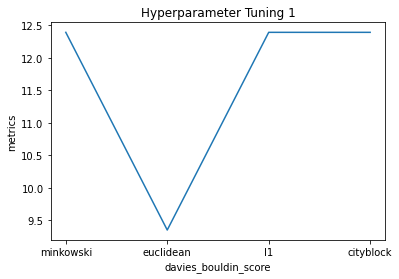

In [54]:
plt.plot(['minkowski','euclidean','l1','cityblock'],[bestmet['minkowski'][1],bestmet['euclidean'][1],bestmet['l1'][1],bestmet['cityblock'][1]] )
plt.xlabel('davies_bouldin_score')
plt.ylabel('metrics')
plt.title('Hyperparameter Tuning 1')
plt.show()

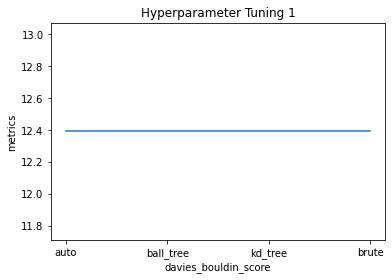

In [58]:
plt.plot(['auto','ball_tree','kd_tree','brute'],[bestp[1][1],bestalgo['ball_tree'][1],bestalgo['kd_tree'][1],bestalgo['brute'][1]] )
plt.xlabel('davies_bouldin_score')
plt.ylabel('metrics')
plt.title('Hyperparameter Tuning 1')
plt.show()

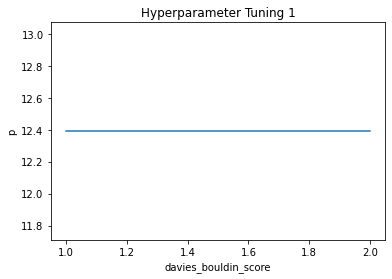

In [61]:
plt.plot([1,2],[bestp[1][1],bestp[2][1]] )
plt.xlabel('davies_bouldin_score')
plt.ylabel('p')
plt.title('Hyperparameter Tuning 1')
plt.show()

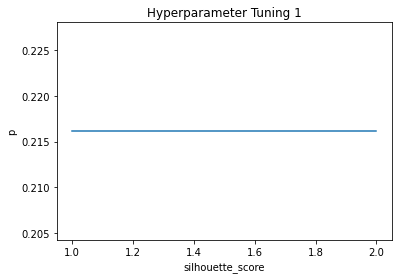

In [62]:
plt.plot([1,2],[bestp[1][0],bestp[2][0]] )
plt.xlabel('silhouette_score')
plt.ylabel('p')
plt.title('Hyperparameter Tuning 1')
plt.show()

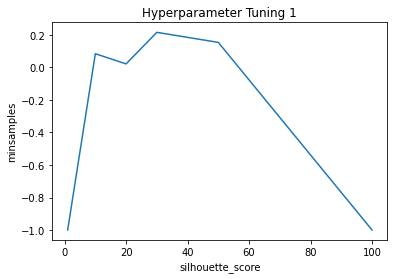

In [64]:
plt.plot([1,10,20,30,50,100],[bestmin[1][0],bestmin[10][0],bestmin[20][0],bestmin[30][0],bestmin[50][0],bestmin[100][0]] )
plt.xlabel('silhouette_score')
plt.ylabel('minsamples')
plt.title('Hyperparameter Tuning 1')
plt.show()

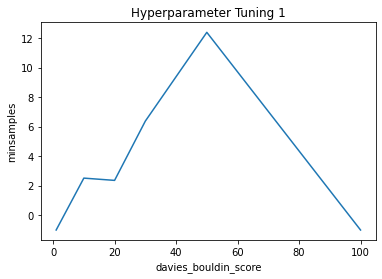

In [66]:
plt.plot([1,10,20,30,50,100],[bestmin[1][1],bestmin[10][1],bestmin[20][1],bestmin[30][1],bestmin[50][1],bestmin[100][1]] )
plt.xlabel('davies_bouldin_score')
plt.ylabel('minsamples')
plt.title('Hyperparameter Tuning 1')
plt.show()

Dataset 1
(10, 'minkowski', 1, 'auto')
Silhouette: 0.05729002446115695
Calinski Harabasz Score: 19.910885378609276
Davies Bouldin Score: 1.5045449741702943


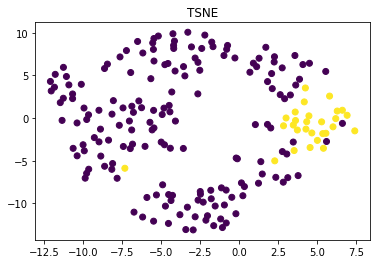

Dataset 2
(20, 'minkowski', 1, 'auto')
Rand Score 0.0177205632425272
Mutual Info Score: 0.017806938342831896
Homogenity Score: 0.03044035238912129
Completeness Score: 0.02976275800215484
Fowlkes Mallows Score: 0.3487024050085903
F1 Score: 0.1528108672936259


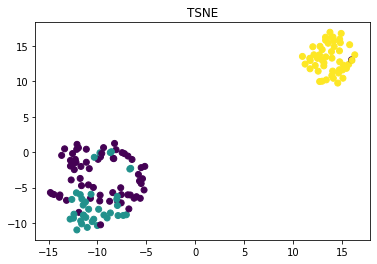

Dataset 3
(10, 'minkowski', 1, 'auto')
Rand Score 2.6210064886093375e-06
Mutual Info Score: 0.0004754175021254115
Homogenity Score: 0.025581043422375216
Completeness Score: 0.0014435285391151346
Fowlkes Mallows Score: 0.4931501439917563
F1 Score: 0.00028998917029240213


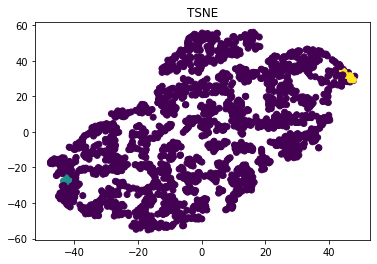

In [22]:
print('Dataset 1')
runOptics(x1_random,tsneRes1_random,1)
print('Dataset 2')
runOptics(x2_random,tsneRes2_random,2,y2)
print('Dataset 3')
runOptics(x3_random,tsneRes3_random,3,y3)

In [23]:
def runAgglomerative(x,tsne,ch,y=[]):
  model=AgglomerativeClustering()
  if ch==2:
    n_clusters=[2,3,4,5,6]
    affinity=['minkowski','euclidean','l1','l2']
    linkage=['ward', 'complete', 'average', 'single']
    params=[]
    for i in n_clusters:
      for j in affinity:
        for l in linkage:
            if l=='ward' and j!='euclidean':
              continue
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      model =AgglomerativeClustering(n_clusters=param[0],affinity=param[1],linkage=param[2])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=model.labels_
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  elif ch==3:
    n_clusters=[2,3,4,5,6,7,8]
    affinity=['minkowski','euclidean','l1','l2']
    linkage=['ward', 'complete', 'average', 'single']
    params=[]
    for i in n_clusters:
      for j in affinity:
        for l in linkage:
            if l=='ward' and j!='euclidean':
              continue
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      model =AgglomerativeClustering(n_clusters=param[0],affinity=param[1],linkage=param[2])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=model.labels_
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  else:
    n_clusters=[2,3,4,5,6,7,8,9,10]
    affinity=['minkowski','euclidean','l1','l2']
    linkage=['ward', 'complete', 'average', 'single']
    params=[]
    for i in n_clusters:
      for j in affinity:
        for l in linkage:
            if l=='ward' and j!='euclidean':
              continue
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      model =AgglomerativeClustering(n_clusters=param[0],affinity=param[1],linkage=param[2])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if metrics.silhouette_score(x,lab, metric='euclidean')>best:
          best=metrics.silhouette_score(x,lab, metric='euclidean')
          bestLab=model.labels_
          bestP=param
    print(bestP)
    print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
    print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
    print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()

Dataset 1
(6, 'euclidean', 'ward')
Silhouette: 0.4428008535928764
Calinski Harabasz Score: 159.3286285014588
Davies Bouldin Score: 0.7690392732314951


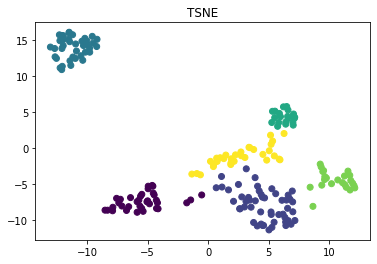

Dataset 2
(3, 'minkowski', 'average')
Rand Score 0.7591987071071522
Mutual Info Score: 0.8032287370935435
Homogenity Score: 0.8156456882407057
Completeness Score: 0.7959816227812412
Fowlkes Mallows Score: 0.8407289157574822
Contingency Matrix:
[[ 0 50 14]
 [50  0  0]
 [ 0  0 36]]


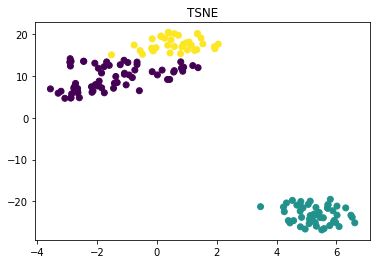

Dataset 3
(5, 'minkowski', 'average')
Rand Score 0.453878291068894
Mutual Info Score: 0.5162886141604436
Homogenity Score: 0.5246170478422202
Completeness Score: 0.5103069988959275
Fowlkes Mallows Score: 0.60064018133671
Contingency Matrix:
[[500 278  15   0]
 [  0   0  36 393]
 [  0 117 105   5]
 [  0 105 342  80]
 [  0   0   2  22]]


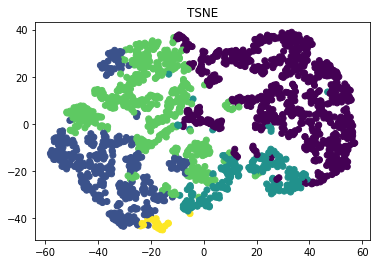

In [24]:
print('Dataset 1')
runAgglomerative(x1,tsneRes1,1)
print('Dataset 2')
runAgglomerative(x2,tsneRes2,2,y2)
print('Dataset 3')
runAgglomerative(x3,tsneRes3,3,y3)

In [25]:
def runAgglomerativeHyper(x,tsne,ch,y=[]):
  model=AgglomerativeClustering()
  if ch==2:
    n_clusters=[2,3,4,5,6]
    affinity=['minkowski','euclidean','l1','l2']
    linkage=['ward', 'complete', 'average', 'single']
    params=[]
    for i in n_clusters:
      for j in affinity:
        for l in linkage:
            if l=='ward' and j!='euclidean':
              continue
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    best_dict={'ward':[0,0,0,0],'complete':[0,0,0,0],'average':[0,0,0,0],'single':[0,0,0,0]}
    for param in params:
      model =AgglomerativeClustering(n_clusters=param[0],affinity=param[1],linkage=param[2])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if best_dict[param[2]][3]<metrics.adjusted_rand_score(lab,y):
          best_dict[param[2]]=[param[0],param[1],model.labels_,metrics.adjusted_rand_score(lab,y)]
    for key in best_dict:
      bestLab=best_dict[key][2]
      print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
      print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
      print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
      print('Completeness Score:',metrics.completeness_score(bestLab,y))
      print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
      print('Contingency Matrix:')
      print(contingency_matrix(bestLab,y))
      plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
      plt.title(key+" ".join(str(best_dict[key][:2])))
      plt.show() 
  elif ch==3:
    n_clusters=[2,3,4,5,6,7,8]
    affinity=['minkowski','euclidean','l1','l2']
    linkage=['ward', 'complete', 'average', 'single']
    params=[]
    for i in n_clusters:
      for j in affinity:
        for l in linkage:
            if l=='ward' and j!='euclidean':
              continue
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    best_dict={'ward':[0,0,0,0],'complete':[0,0,0,0],'average':[0,0,0,0],'single':[0,0,0,0]}
    for param in params:
      model =AgglomerativeClustering(n_clusters=param[0],affinity=param[1],linkage=param[2])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if best_dict[param[2]][3]<metrics.adjusted_rand_score(lab,y):
          best_dict[param[2]]=[param[0],param[1],model.labels_,metrics.adjusted_rand_score(lab,y)]
    for key in best_dict:
      bestLab=best_dict[key][2]
      print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
      print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
      print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
      print('Completeness Score:',metrics.completeness_score(bestLab,y))
      print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
      print('Contingency Matrix:')
      print(contingency_matrix(bestLab,y))
      plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
      plt.title(key+" ".join(str(best_dict[key][:2])))
      plt.show() 
  else:
    n_clusters=[2,3,4,5,6,7,8,9,10]
    affinity=['minkowski','euclidean','l1','l2']
    linkage=['ward', 'complete', 'average', 'single']
    params=[]
    for i in n_clusters:
      for j in affinity:
        for l in linkage:
            if l=='ward' and j!='euclidean':
              continue
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    best_dict={'ward':[0,0,0,0],'complete':[0,0,0,0],'average':[0,0,0,0],'single':[0,0,0,0]}
    for param in params:
      model =AgglomerativeClustering(n_clusters=param[0],affinity=param[1],linkage=param[2])
      mod = model.fit(x)
      lab = mod.labels_
      if len(set(lab))>1:
        if best_dict[param[2]][3]<metrics.silhouette_score(x,model.labels_, metric='euclidean'):
          best_dict[param[2]]=[param[0],param[1],model.labels_,metrics.silhouette_score(x,model.labels_, metric='euclidean')]
    for key in best_dict:
      bestLab=best_dict[key][2]
      print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
      print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
      print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
      plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
      plt.title(key+" ".join(str(best_dict[key][:2])))
      plt.show()

Dataset 1
Silhouette: 0.4428008535928764
Calinski Harabasz Score: 159.3286285014588
Davies Bouldin Score: 0.7690392732314951


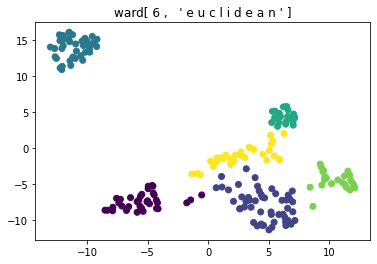

Silhouette: 0.4412306433512191
Calinski Harabasz Score: 148.57626602472678
Davies Bouldin Score: 0.8233147021347269


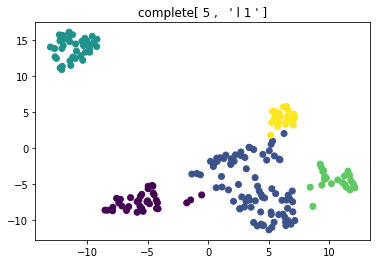

Silhouette: 0.4408059518319421
Calinski Harabasz Score: 148.63325500342526
Davies Bouldin Score: 0.8200043197873048


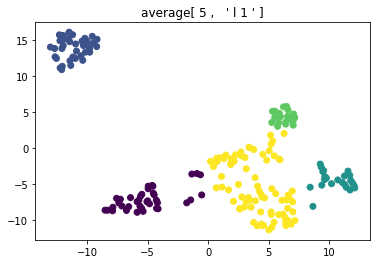

Silhouette: 0.39083611393057793
Calinski Harabasz Score: 4.565973903977023
Davies Bouldin Score: 0.42235010395882705


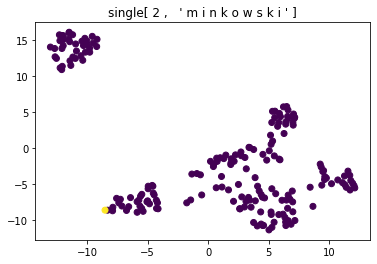

Dataset 2
Rand Score 0.7311985567707746
Mutual Info Score: 0.7671669615713114
Homogenity Score: 0.7795958005591144
Completeness Score: 0.7608008469718723
Fowlkes Mallows Score: 0.8221697785442927
Contingency Matrix:
[[ 0 49 15]
 [50  0  0]
 [ 0  1 35]]


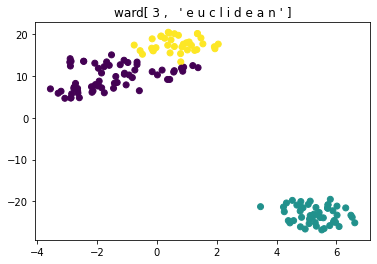

Rand Score 0.7322981167185344
Mutual Info Score: 0.7880116792998713
Homogenity Score: 0.80358854062315
Completeness Score: 0.7781768659513969
Fowlkes Mallows Score: 0.8237641241035158
Contingency Matrix:
[[ 0 50 16]
 [ 0  0 34]
 [50  0  0]]


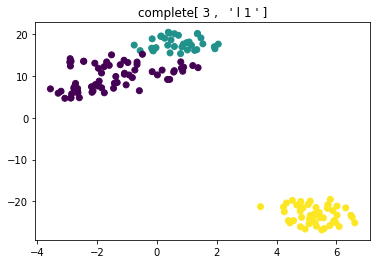

Rand Score 0.7591987071071522
Mutual Info Score: 0.8032287370935435
Homogenity Score: 0.8156456882407057
Completeness Score: 0.7959816227812412
Fowlkes Mallows Score: 0.8407289157574822
Contingency Matrix:
[[ 0 50 14]
 [50  0  0]
 [ 0  0 36]]


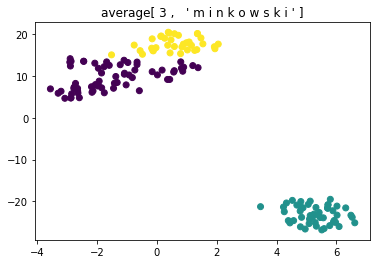

Rand Score 0.5681159420289855
Mutual Info Score: 0.7315847607219575
Homogenity Score: 0.9999999999999997
Completeness Score: 0.5793801642856945
Fowlkes Mallows Score: 0.7714542762891773
Contingency Matrix:
[[ 0 50 50]
 [50  0  0]]


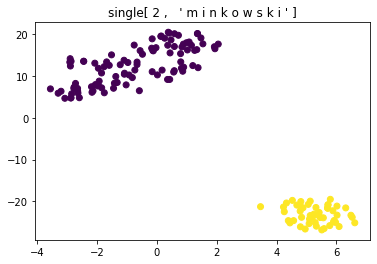

Dataset 3
Rand Score 0.3837839259588699
Mutual Info Score: 0.4433461822457896
Homogenity Score: 0.5060772988858434
Completeness Score: 0.39552531814054853
Fowlkes Mallows Score: 0.5688289200682985
Contingency Matrix:
[[457 249  27   0]
 [ 43 250 380  87]
 [  0   1  93 413]]


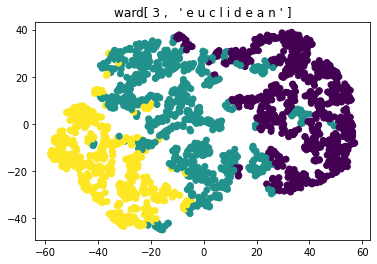

Rand Score 0.3663441260119951
Mutual Info Score: 0.448887123655946
Homogenity Score: 0.48829823287849616
Completeness Score: 0.4170268056039935
Fowlkes Mallows Score: 0.5521434068877462
Contingency Matrix:
[[ 92 384 348  51]
 [408 109   0   0]
 [  0   0 142 394]
 [  0   7  10  55]]


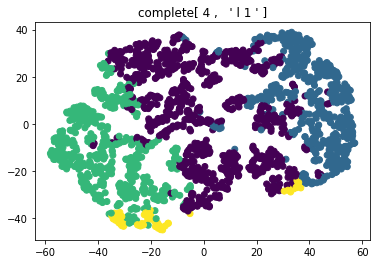

Rand Score 0.453878291068894
Mutual Info Score: 0.5162886141604436
Homogenity Score: 0.5246170478422202
Completeness Score: 0.5103069988959275
Fowlkes Mallows Score: 0.60064018133671
Contingency Matrix:
[[500 278  15   0]
 [  0   0  36 393]
 [  0 117 105   5]
 [  0 105 342  80]
 [  0   0   2  22]]


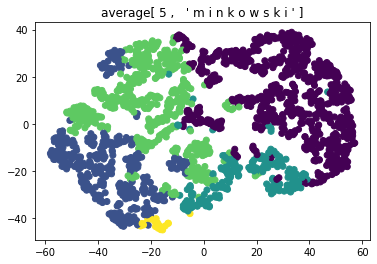

Rand Score 8.40520509510354e-06
Mutual Info Score: 0.0033353752962057876
Homogenity Score: 0.17720803758407902
Completeness Score: 0.0045031688049437905
Fowlkes Mallows Score: 0.497382979222493
Contingency Matrix:
[[498 496 497 500]
 [  0   4   0   0]
 [  0   0   1   0]
 [  0   0   1   0]
 [  2   0   0   0]
 [  0   0   1   0]]


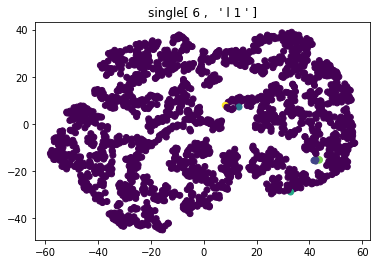

In [26]:
print('Dataset 1')
runAgglomerativeHyper(x1,tsneRes1,1)
print('Dataset 2')
runAgglomerativeHyper(x2,tsneRes2,2,y2)
print('Dataset 3')
runAgglomerativeHyper(x3,tsneRes3,3,y3)

Dataset 1
(2, 'minkowski', 'single')
Silhouette: 0.30571925316836734
Calinski Harabasz Score: 3.3963767883969784
Davies Bouldin Score: 0.5035913852665876


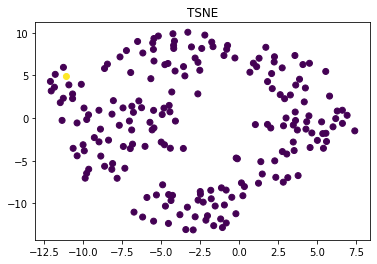

Dataset 2
(5, 'l1', 'average')
Rand Score -0.0015059692601671131
Mutual Info Score: 0.002583958898401507
Homogenity Score: 0.020803289527635646
Completeness Score: 0.028201580295917496
Fowlkes Mallows Score: 0.28213688131519443
Contingency Matrix:
[[13 16 17]
 [15 19 16]
 [ 5  3  7]
 [ 6  9  5]
 [11  3  5]]


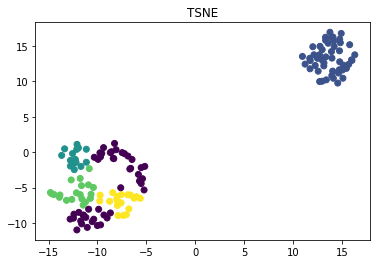

Dataset 3
(3, 'minkowski', 'complete')
Rand Score 0.0009448737533916927
Mutual Info Score: 0.0007733493759375192
Homogenity Score: 0.002647867227322638
Completeness Score: 0.0017232482035677765
Fowlkes Mallows Score: 0.3321868459233858
Contingency Matrix:
[[262 256 251 288]
 [206 199 210 173]
 [ 32  45  39  39]]


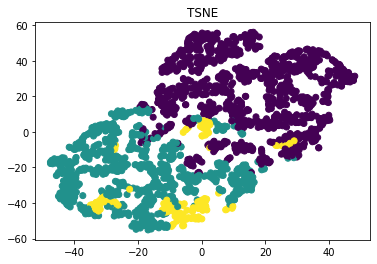

In [27]:
print('Dataset 1')
runAgglomerative(x1_random,tsneRes1_random,1)
print('Dataset 2')
runAgglomerative(x2_random,tsneRes2_random,2,y2)
print('Dataset 3')
runAgglomerative(x3_random,tsneRes3_random,3,y3)

In [8]:
def runKMeans(x,tsne,ch,y=[]):
  if ch==2:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmeans(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=lab
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  elif ch==3:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmeans(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=lab
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  else:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmeans(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.silhouette_score(x,lab, metric='euclidean')>best:
          best=metrics.silhouette_score(x,lab, metric='euclidean')
          bestLab=lab
          bestP=param
    print(bestP)
    print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
    print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
    print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()  

Dataset 1
(6, 0.1, <pyclustering.utils.metric.distance_metric object at 0x7fb89dd85890>)
Silhouette: 0.45205475380756527
Calinski Harabasz Score: 166.58349562213596
Davies Bouldin Score: 0.7475215820921529


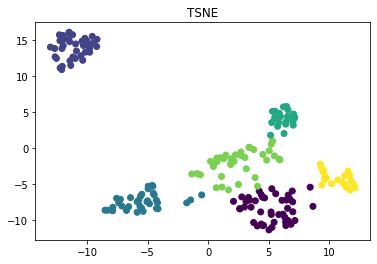

Dataset 2
(3, 0.1, <pyclustering.utils.metric.distance_metric object at 0x7fb89d9f7050>)
Rand Score 0.7429751965483791
Mutual Info Score: 0.7547430126556242
Homogenity Score: 0.7615735349464856
Completeness Score: 0.7540458611289466
Fowlkes Mallows Score: 0.8284706969096732
Contingency Matrix:
[[ 0 12 47]
 [50  0  0]
 [ 0 38  3]]


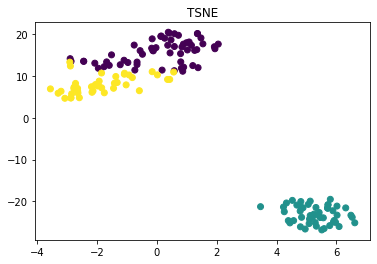

Dataset 3
(4, 0.01, <pyclustering.utils.metric.distance_metric object at 0x7fb89d5b0bd0>)
Rand Score 0.47594985977366483
Mutual Info Score: 0.5089209757960981
Homogenity Score: 0.514400874092532
Completeness Score: 0.5051373931302444
Fowlkes Mallows Score: 0.609888327781048
Contingency Matrix:
[[ 13 212 258  18]
 [  9 176 116  23]
 [  0   0 126 459]
 [478 112   0   0]]


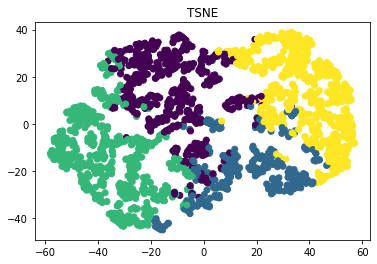

In [9]:
print('Dataset 1')
runKMeans(x1,tsneRes1,1)
print('Dataset 2')
runKMeans(x2,tsneRes2,2,y2)
print('Dataset 3')
runKMeans(x3,tsneRes3,3,y3)

In [10]:
def runKMedians(x,tsne,ch,y=[]):
  if ch==2:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmedians(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=lab
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  elif ch==3:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmedians(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=lab
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  else:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmedians(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.silhouette_score(x,lab, metric='euclidean')>best:
          best=metrics.silhouette_score(x,lab, metric='euclidean')
          bestLab=lab
          bestP=param
    print(bestP)
    print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
    print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
    print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()  

Dataset 1
(3, 0.01, <pyclustering.utils.metric.distance_metric object at 0x7fb89dd8d950>)
Silhouette: 0.3541672271834039
Calinski Harabasz Score: 98.99569077475941
Davies Bouldin Score: 1.0076438069995124


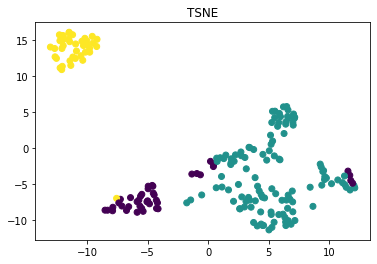

Dataset 2
(3, 0.001, <pyclustering.utils.metric.distance_metric object at 0x7fb89f5b0fd0>)
Rand Score 0.8177533513813235
Mutual Info Score: 0.8046877597110332
Homogenity Score: 0.8078904237584275
Completeness Score: 0.8063199491601305
Fowlkes Mallows Score: 0.877819067879616
Contingency Matrix:
[[ 0  7 47]
 [50  0  0]
 [ 0 43  3]]


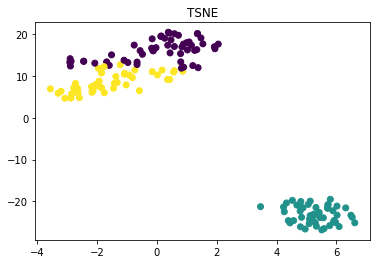

Dataset 3
(4, 0.01, <pyclustering.utils.metric.distance_metric object at 0x7fb89d7b3f10>)
Rand Score 0.4484719438215143
Mutual Info Score: 0.4857222052220016
Homogenity Score: 0.48975250048722696
Completeness Score: 0.4834170750532026
Fowlkes Mallows Score: 0.5885461948877581
Contingency Matrix:
[[  0   0  57 439]
 [ 84 177  78  15]
 [412 135   0   0]
 [  4 188 365  46]]


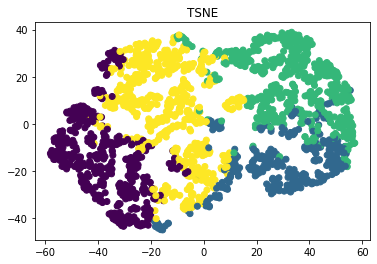

In [11]:
print('Dataset 1')
runKMedians(x1,tsneRes1,1)
print('Dataset 2')
runKMedians(x2,tsneRes2,2,y2)
print('Dataset 3')
runKMedians(x3,tsneRes3,3,y3)

In [42]:
def runFCMm(x,tsne,ch,y=[]):
  if ch==2:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    itermax=[50,100,200,400,500]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in itermax:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = fcm(x.values, initCen,tolerance=param[1],itermax=param[2],m=1.4)
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=lab
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  elif ch==3:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    itermax=[50,100,200,400,500]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in itermax:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = fcm(x.values, initCen,tolerance=param[1],itermax=param[2],m=1.05)      
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.adjusted_rand_score(lab,y)>best:
          best=metrics.adjusted_rand_score(lab,y)
          bestLab=lab
          bestP=param
    print(bestP)
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  else:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    itermax=[50,100,200,400,500]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in itermax:
            params.append((i,j,l))
    best=-1
    bestLab=[]
    bestP=()
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = fcm(x.values, initCen,tolerance=param[1],itermax=param[2],m=1.5)
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        if metrics.silhouette_score(x,lab, metric='euclidean')>best:
          best=metrics.silhouette_score(x,lab, metric='euclidean')
          bestLab=lab
          bestP=param
    print(bestP)
    print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
    print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
    print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()  

Dataset 1
(6, 0.01, 100)
Silhouette: 0.45206493204632353
Calinski Harabasz Score: 166.5764097728029
Davies Bouldin Score: 0.7448567425361441


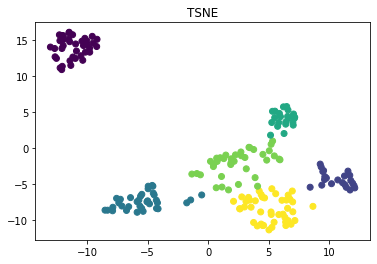

Dataset 2
(3, 0.1, 400)
Rand Score 0.7570029149464148
Mutual Info Score: 0.7635174040447257
Homogenity Score: 0.7694659571373278
Completeness Score: 0.7634634612201873
Fowlkes Mallows Score: 0.8376357415577395
Contingency Matrix:
[[ 0 11 47]
 [50  0  0]
 [ 0 39  3]]


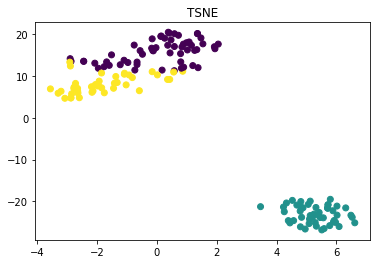

Dataset 3
(4, 0.01, 50)
Rand Score 0.46566375621356243
Mutual Info Score: 0.5031932701591302
Homogenity Score: 0.5089772447155089
Completeness Score: 0.4991373902632317
Fowlkes Mallows Score: 0.6025212330103508
Contingency Matrix:
[[ 15 218 234   9]
 [  8 156 131  31]
 [  0   0 135 460]
 [477 126   0   0]]


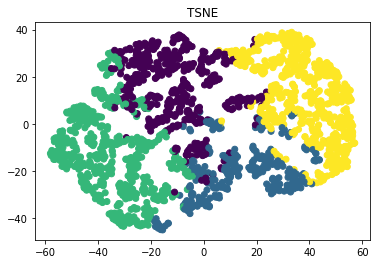

In [43]:
print('Dataset 1')
runFCMm(x1,tsneRes1,1)
print('Dataset 2')
runFCMm(x2,tsneRes2,2,y2)
print('Dataset 3')
runFCMm(x3,tsneRes3,3,y3)

In [88]:
def runKMediansTune(x,tsne,ch,y=[]):
  if ch==2:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    mstring=['euclidean','chebyshev','minkowski']
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    bestn={2:-1,3:-1,4:-1,5:-1,6:-1,7:-1,8:-1}   
    bestt={0.001:-1,0.01:-1,0.1:-1}    
    bestm={'euclidean':-1,'chebyshev':-1,'minkowski':-1}     
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmedians(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        bestn[param[0]]=max(bestn[param[0]],metrics.adjusted_rand_score(lab,y))
        bestt[param[1]]=max(bestt[param[1]],metrics.adjusted_rand_score(lab,y))
        if param[2]==metric[0]:
          bestm['euclidean']=max(bestm['euclidean'],metrics.adjusted_rand_score(lab,y))
        elif param[2]==metric[1]:
          bestm['chebyshev']=max(bestm['chebyshev'],metrics.adjusted_rand_score(lab,y))
        else:
          bestm['minkowski']=max(bestm['minkowski'],metrics.adjusted_rand_score(lab,y))
    plt.plot([2,3,4,5,6,7,8],[bestn[2],bestn[3],bestn[4],bestn[5],bestn[6],bestn[7],bestn[8]] )
    plt.xlabel('rand score')
    plt.ylabel('nclusters')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([0.001,0.01,0.1],[bestt[0.001],bestt[0.01],bestt[0.1]] )
    plt.xlabel('rand score')
    plt.ylabel('tolerance')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot(['euclidean','chebyshev','minkowski'],[bestm['euclidean'],bestm['chebyshev'],bestm['minkowski']] )
    plt.xlabel('rand score')
    plt.ylabel('metric')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
  elif ch==3:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    mstring=['euclidean','chebyshev','minkowski']
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    bestn={2:-1,3:-1,4:-1,5:-1,6:-1,7:-1,8:-1}   
    bestt={0.001:-1,0.01:-1,0.1:-1}    
    bestm={'euclidean':-1,'chebyshev':-1,'minkowski':-1}     
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmedians(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        bestn[param[0]]=max(bestn[param[0]],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestt[param[1]]=max(bestt[param[1]],metrics.silhouette_score(x,lab, metric='euclidean'))
        if param[2]==metric[0]:
          bestm['euclidean']=max(bestm['euclidean'],metrics.silhouette_score(x,lab, metric='euclidean'))
        elif param[2]==metric[1]:
          bestm['chebyshev']=max(bestm['chebyshev'],metrics.silhouette_score(x,lab, metric='euclidean'))
        else:
          bestm['minkowski']=max(bestm['minkowski'],metrics.silhouette_score(x,lab, metric='euclidean'))
    plt.plot([2,3,4,5,6,7,8],[bestn[2],bestn[3],bestn[4],bestn[5],bestn[6],bestn[7],bestn[8]] )
    plt.xlabel('rand score')
    plt.ylabel('nclusters')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([0.001,0.01,0.1],[bestt[0.001],bestt[0.01],bestt[0.1]] )
    plt.xlabel('rand score')
    plt.ylabel('tolerance')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot(['euclidean','chebyshev','minkowski'],[bestm['euclidean'],bestm['chebyshev'],bestm['minkowski']] )
    plt.xlabel('rand score')
    plt.ylabel('metric')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
  else:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[distance_metric(type_metric.EUCLIDEAN),distance_metric(type_metric.CHEBYSHEV),distance_metric(type_metric.MINKOWSKI, degree=2)]
    mstring=['euclidean','chebyshev','minkowski']
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    bestn={2:-1,3:-1,4:-1,5:-1,6:-1,7:-1,8:-1}   
    bestt={0.001:-1,0.01:-1,0.1:-1}    
    bestm={'euclidean':-1,'chebyshev':-1,'minkowski':-1}     
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = kmedians(x.values, initCen,tolerance=param[1],metric=param[2])
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        bestn[param[0]]=max(bestn[param[0]],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestt[param[1]]=max(bestt[param[1]],metrics.silhouette_score(x,lab, metric='euclidean'))
        if param[2]==metric[0]:
          bestm['euclidean']=max(bestm['euclidean'],metrics.silhouette_score(x,lab, metric='euclidean'))
        elif param[2]==metric[1]:
          bestm['chebyshev']=max(bestm['chebyshev'],metrics.silhouette_score(x,lab, metric='euclidean'))
        else:
          bestm['minkowski']=max(bestm['minkowski'],metrics.silhouette_score(x,lab, metric='euclidean'))
    plt.plot([2,3,4,5,6,7,8],[bestn[2],bestn[3],bestn[4],bestn[5],bestn[6],bestn[7],bestn[8]] )
    plt.xlabel('rand score')
    plt.ylabel('nclusters')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([0.001,0.01,0.1],[bestt[0.001],bestt[0.01],bestt[0.1]] )
    plt.xlabel('rand score')
    plt.ylabel('tolerance')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot(['euclidean','chebyshev','minkowski'],[bestm['euclidean'],bestm['chebyshev'],bestm['minkowski']] )
    plt.xlabel('rand score')
    plt.ylabel('metric')
    plt.title('Hyperparameter Tuning 1')
    plt.show()

Dataset 1


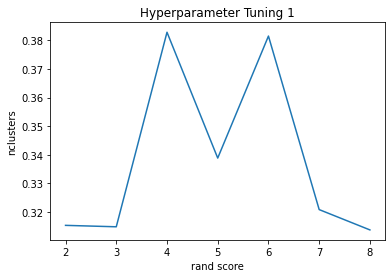

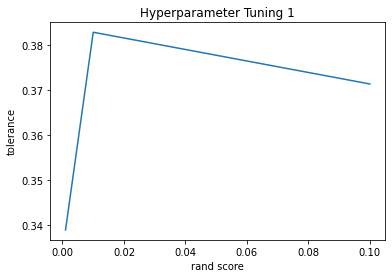

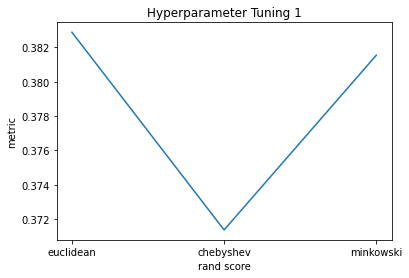

Dataset 2


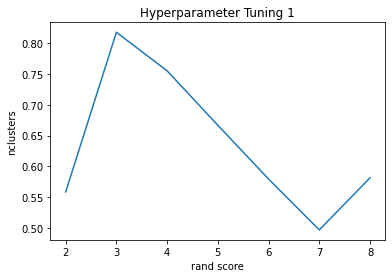

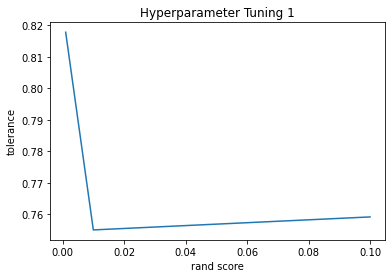

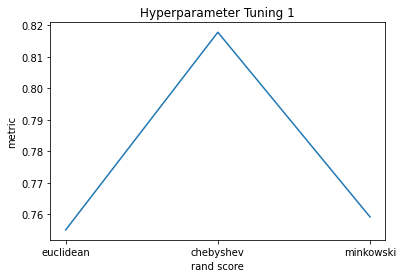

Dataset 3


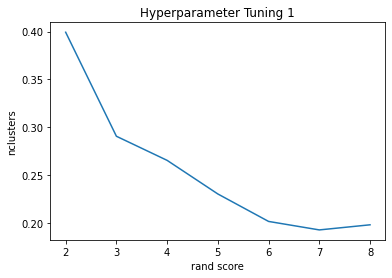

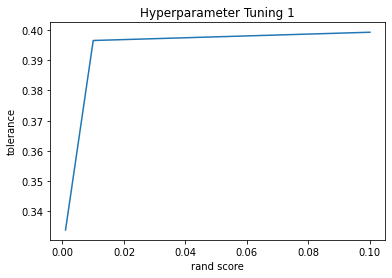

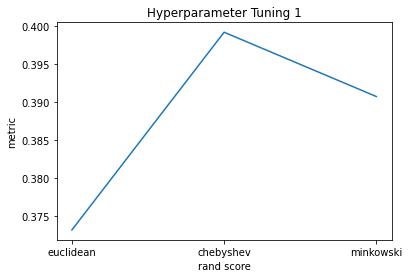

In [90]:
print('Dataset 1')
runKMediansTune(x1,tsneRes1,1)
print('Dataset 2')
runKMediansTune(x2,tsneRes2,2,y2)
print('Dataset 3')
runKMediansTune(x3,tsneRes3,3,y3)

In [100]:
def runFCMmTune(x,tsne,ch,y=[]):
  if ch==2:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[50,100,200,400,500]
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    bestn={2:-1,3:-1,4:-1,5:-1,6:-1,7:-1,8:-1}   
    bestt={0.001:-1,0.01:-1,0.1:-1}    
    bestm={50:-1,100:-1,200:-1,400:-1,500:-1}     
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = fcm(x.values, initCen,tolerance=param[1],itermax=param[2],m=1.4)
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        bestn[param[0]]=max(bestn[param[0]],metrics.adjusted_rand_score(lab,y))
        bestt[param[1]]=max(bestt[param[1]],metrics.adjusted_rand_score(lab,y))
        bestm[param[2]]=max(bestm[param[2]],metrics.adjusted_rand_score(lab,y))
    plt.plot([2,3,4,5,6,7,8],[bestn[2],bestn[3],bestn[4],bestn[5],bestn[6],bestn[7],bestn[8]] )
    plt.xlabel('rand score')
    plt.ylabel('nclusters')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([0.001,0.01,0.1],[bestt[0.001],bestt[0.01],bestt[0.1]] )
    plt.xlabel('rand score')
    plt.ylabel('tolerance')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([50,100,200,400,500],[bestm[50],bestm[100],bestm[200],bestm[400],bestm[500]] )
    plt.xlabel('rand score')
    plt.ylabel('itermax')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
  elif ch==3:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[50,100,200,400,500]
    mstring=['euclidean','chebyshev','minkowski']
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    bestn={2:-1,3:-1,4:-1,5:-1,6:-1,7:-1,8:-1}   
    bestt={0.001:-1,0.01:-1,0.1:-1}    
    bestm={50:-1,100:-1,200:-1,400:-1,500:-1}       
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = fcm(x.values, initCen,tolerance=param[1],itermax=param[2],m=1.05)
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        bestn[param[0]]=max(bestn[param[0]],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestt[param[1]]=max(bestt[param[1]],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestm[param[2]]=max(bestm[param[2]],metrics.silhouette_score(x,lab, metric='euclidean'))

    plt.plot([2,3,4,5,6,7,8],[bestn[2],bestn[3],bestn[4],bestn[5],bestn[6],bestn[7],bestn[8]] )
    plt.xlabel('rand score')
    plt.ylabel('nclusters')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([0.001,0.01,0.1],[bestt[0.001],bestt[0.01],bestt[0.1]] )
    plt.xlabel('rand score')
    plt.ylabel('tolerance')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([50,100,200,400,500],[bestm[50],bestm[100],bestm[200],bestm[400],bestm[500]] )
    plt.xlabel('rand score')
    plt.ylabel('itermax')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
  else:
    n_clusters=[2,3,4,5,6,7,8]
    tolerance=[0.01,0.001,0.1]
    metric=[50,100,200,400,500]
    mstring=['euclidean','chebyshev','minkowski']
    params=[]
    for i in n_clusters:
      for j in tolerance:
        for l in metric:
            params.append((i,j,l))
    bestn={2:-1,3:-1,4:-1,5:-1,6:-1,7:-1,8:-1}   
    bestt={0.001:-1,0.01:-1,0.1:-1}    
    bestm={50:-1,100:-1,200:-1,400:-1,500:-1}        
    for param in params:
      initCen = kmeans_plusplus_initializer(x.values,param[0], kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
      mod = fcm(x.values, initCen,tolerance=param[1],itermax=param[2],m=1.5)
      mod.process()
      clusters = mod.get_clusters()
      lab=[0 for i in range(len(x))]
      for i in range(len(clusters)):
        for j in clusters[i]:
          lab[j]=i
      if len(set(lab))>1:
        bestn[param[0]]=max(bestn[param[0]],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestt[param[1]]=max(bestt[param[1]],metrics.silhouette_score(x,lab, metric='euclidean'))
        bestm[param[2]]=max(bestm[param[2]],metrics.silhouette_score(x,lab, metric='euclidean'))

    plt.plot([2,3,4,5,6,7,8],[bestn[2],bestn[3],bestn[4],bestn[5],bestn[6],bestn[7],bestn[8]] )
    plt.xlabel('rand score')
    plt.ylabel('nclusters')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([0.001,0.01,0.1],[bestt[0.001],bestt[0.01],bestt[0.1]] )
    plt.xlabel('rand score')
    plt.ylabel('tolerance')
    plt.title('Hyperparameter Tuning 1')
    plt.show()
    plt.plot([50,100,200,400,500],[bestm[50],bestm[100],bestm[200],bestm[400],bestm[500]] )
    plt.xlabel('rand score')
    plt.ylabel('itermax')
    plt.title('Hyperparameter Tuning 1')
    plt.show()

Dataset 1


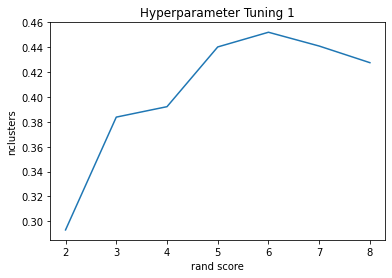

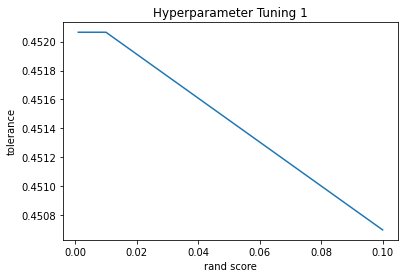

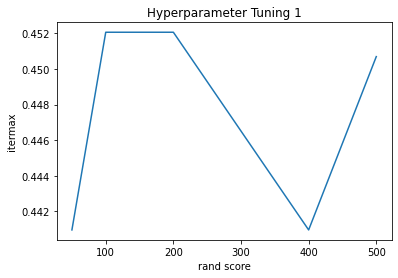

Dataset 2


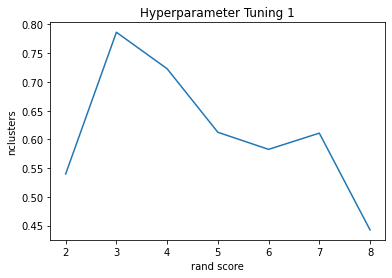

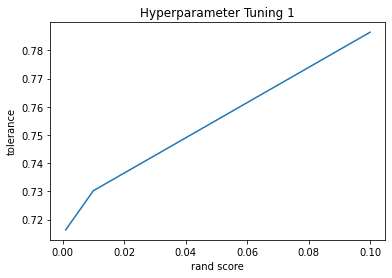

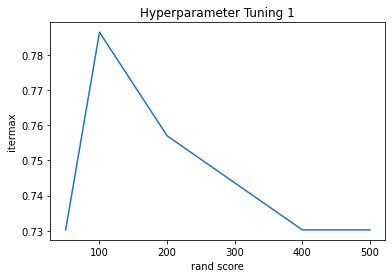

Dataset 3


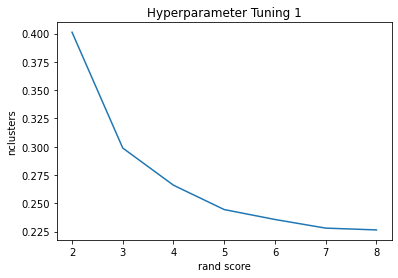

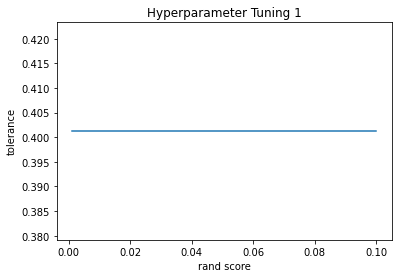

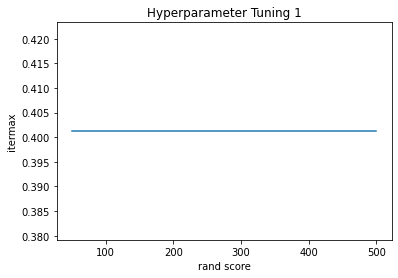

In [101]:
print('Dataset 1')
runFCMmTune(x1,tsneRes1,1)
print('Dataset 2')
runFCMmTune(x2,tsneRes2,2,y2)
print('Dataset 3')
runFCMmTune(x3,tsneRes3,3,y3)

Dataset 1
(2, 0.001, <pyclustering.utils.metric.distance_metric object at 0x7fb89d7cc5d0>)
Silhouette: 0.2822050937872717
Calinski Harabasz Score: 90.3416662081258
Davies Bouldin Score: 1.3573719941476874


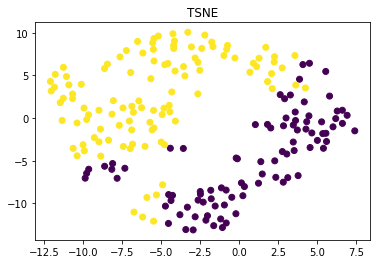

Dataset 2
(7, 0.1, <pyclustering.utils.metric.distance_metric object at 0x7fb89ca7bc10>)
Rand Score 0.02238517946738711
Mutual Info Score: 0.026746244321390278
Homogenity Score: 0.04279435016245225
Completeness Score: 0.07337539330620144
Fowlkes Mallows Score: 0.24646723396188028
Contingency Matrix:
[[10 19 11]
 [ 4 10  5]
 [ 6  6  2]
 [ 6  3 11]
 [ 6  2  7]
 [ 5  5  9]
 [13  5  5]]


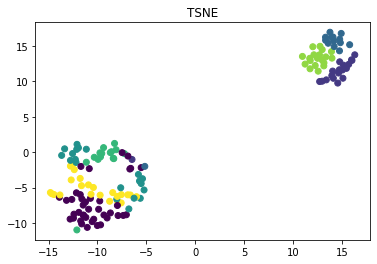

Dataset 3
(4, 0.1, <pyclustering.utils.metric.distance_metric object at 0x7fb89f65bad0>)
Rand Score 0.0019465597563259201
Mutual Info Score: 0.001749024385769939
Homogenity Score: 0.0035445051448753802
Completeness Score: 0.003317946817334392
Fowlkes Mallows Score: 0.2685146800490716
Contingency Matrix:
[[189 159 165 131]
 [137 158 154 171]
 [ 36  50  43  46]
 [138 133 138 152]]


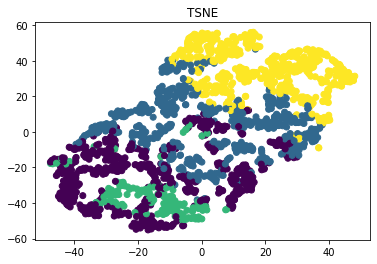

In [28]:
print('Dataset 1')
runKMedians(x1_random,tsneRes1_random,1)
print('Dataset 2')
runKMedians(x2_random,tsneRes2_random,2,y2)
print('Dataset 3')
runKMedians(x3_random,tsneRes3_random,3,y3)

Dataset 1
(3, 0.01, 50)
Silhouette: 0.2902089369358343
Calinski Harabasz Score: 101.9623300022042
Davies Bouldin Score: 1.0820342972581376


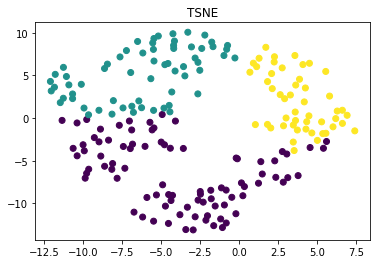

Dataset 2
(8, 0.01, 500)
Rand Score 0.01473362535695365
Mutual Info Score: 0.019441894462729394
Homogenity Score: 0.03833357173104011
Completeness Score: 0.07164959517904348
Fowlkes Mallows Score: 0.21667439646981848
Contingency Matrix:
[[ 4  9  5]
 [ 7  4  6]
 [ 4 12  8]
 [ 6  9  6]
 [ 4  1  7]
 [ 5  5  9]
 [ 6  6  2]
 [14  4  7]]


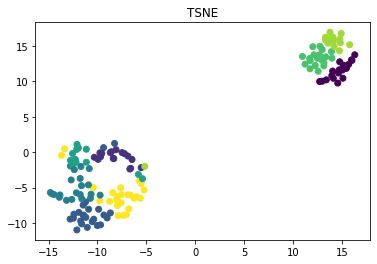

Dataset 3
(2, 0.001, 400)
Rand Score 0.0018917844895291983
Mutual Info Score: 0.0019745174924780647
Homogenity Score: 0.0041270977918307795
Completeness Score: 0.002008333295320351
Fowlkes Mallows Score: 0.3609962225327688
Contingency Matrix:
[[215 207 215 171]
 [285 293 285 329]]


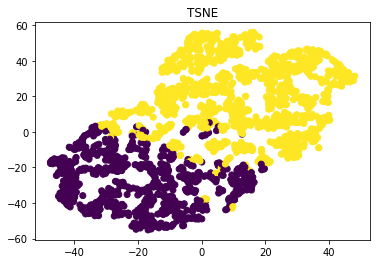

In [29]:
print('Dataset 1')
runFCMm(x1_random,tsneRes1_random,1)
print('Dataset 2')
runFCMm(x2_random,tsneRes2_random,2,y2)
print('Dataset 3')
runFCMm(x3_random,tsneRes3_random,3,y3)

Dataset 1
Silhouette: -0.03434796057402427
Calinski Harabasz Score: 2.278236735413845
Davies Bouldin Score: 20.526813079798448


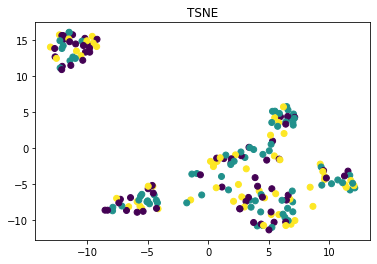

Dataset 2
Rand Score -0.012794557823129252
Mutual Info Score: -0.011781978911183488
Homogenity Score: 0.0007237600169136631
Completeness Score: 0.0007237600169136631
Fowlkes Mallows Score: 0.32027210884353735
Contingency Matrix:
[[16 17 17]
 [16 17 17]
 [18 16 16]]


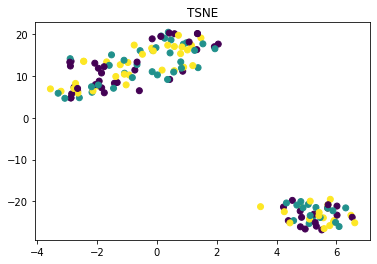

Dataset 3
Rand Score 0.0002462859051436206
Mutual Info Score: 0.00024762071798315166
Homogenity Score: 0.0018736487162593191
Completeness Score: 0.0018736487162593191
Fowlkes Mallows Score: 0.24980961923847692
Contingency Matrix:
[[131 133 114 122]
 [134 116 114 136]
 [119 122 145 114]
 [116 129 127 128]]


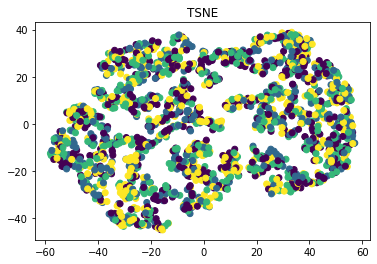

In [49]:
def testBadData(x,tsne,y,bestLab,ch):
  if ch==2:
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  elif ch==3:
    print('Rand Score',metrics.adjusted_rand_score(bestLab,y))
    print('Mutual Info Score:',metrics.adjusted_mutual_info_score(bestLab,y))
    print('Homogenity Score:',metrics.homogeneity_score(bestLab,y))
    print('Completeness Score:',metrics.completeness_score(bestLab,y))
    print('Fowlkes Mallows Score:',metrics.fowlkes_mallows_score(bestLab,y))
    print('Contingency Matrix:')
    print(contingency_matrix(bestLab,y))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show() 
  else:
    print('Silhouette:',metrics.silhouette_score(x,bestLab, metric='euclidean'))
    print('Calinski Harabasz Score:',metrics.calinski_harabasz_score(x,bestLab))
    print('Davies Bouldin Score:',metrics.davies_bouldin_score(x,bestLab))
    plt.scatter(tsne[:, 0], tsne[:, 1], c=bestLab)
    plt.title('TSNE')
    plt.show()  
print('Dataset 1')

testBadData(x1,tsneRes1,[],[random.randrange(0,3) for i in range(200)],1)
print('Dataset 2')
testBadData(x2,tsneRes2,y2,random.sample(list(y2),len(list(y2))),2)
print('Dataset 3')
testBadData(x3,tsneRes3,y3,random.sample(list(y3),len(list(y3))),3)

In [46]:
df1.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40

In [47]:
df1.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [37]:
df2.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

In [38]:
df3.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [39]:
df1.describe()

CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000

In [40]:
df2.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000       1.600000      0.300000   
50%     75.500000       5.800000      3.000000       4.350000      1.300000   
75%    112.750000       6.400000      3.300000       5.100000      1.800000   
max    150.000000       7.900000      4.400000       6.900000      2.500000   

          Species  
count  150.000000  
mean     1.000000  
std      0.819232  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [41]:
df3.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [103]:
np.save('tsneRes1.npy', tsneRes1)
np.save('tsneRes2.npy', tsneRes2)
np.save('tsneRes3.npy', tsneRes3)
